## Data Wrangling
## Introduction
Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. Then we will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) 


## Gathering data
Gather each of the three pieces of data:

 1.The WeRateDogs Twitter archive.
 
 2.The tweet image predictions.
 
 3.The weet_json.txt file that contains each tweet's retweet count and favorite count at a minimum, and any  additional data you find interesting. 
Using the tweet IDs in the WeRateDogs Twitter archive.

In [1]:
#import major libraries
import numpy as np
import pandas as pd
import datetime as dt
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from functools import reduce


In [2]:
# Load data 
df = pd.read_csv("twitter-archive-enhanced.csv")


In [3]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
images = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)



In [5]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet-json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [6]:
# create DataFrame
tweet_json = pd.DataFrame()

In [7]:
# add selected columns
tweet_json['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_json['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_json['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assessing data


In [8]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
df.duplicated().sum()


0

In [13]:
df.nunique()


tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [14]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [18]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### What we found in these files:

## Quality:

#### df file:

1. There are missing values in the 'name' column.

2. Capitalize the first letter of dog name.

3. Erroneous data in the 'name' column.

4. Erroneous datatypes in these columnes:	
[tweet_id , timestamp , retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp]

5. Remove rows where there are no images (expanded_urls).

6. Drop these columns 'retweeted_status_id', 'retweeted_status_user_id'

#### images file:

7. Also erroneous datatypes in the 'tweet_id' column.
 
#### tweet_json file:

8. Also erroneous datatypes in the 'id' column.

9. the name  of the 'id' column should be tweet_id.

10. Capitalize the first letter of p1, p2, p3



## Tidiness:
1. Change tweet_id to type.

2. Create a new column contains the four columns (doggo, floofer, pupper, and puppo).




## Cleaning data


In [20]:
# Create copies of original DataFrames to work off of
df_clean= df.copy()
images_clean= images.copy()
tweet_json_clean= tweet_json.copy()

### Define:
will change missing values in the 'name' column from 'None' to NaN

### code:

In [21]:
df_clean['name'] = df_clean['name'].replace('None', np.NaN)

### Test:

In [22]:
df_clean.name.value_counts()

a          55
Charlie    12
Cooper     11
Lucy       11
Oliver     11
Lola       10
Penny      10
Tucker     10
Bo          9
Winston     9
Sadie       8
the         8
Bailey      7
an          7
Toby        7
Buddy       7
Daisy       7
Stanley     6
Oscar       6
Milo        6
Scout       6
Leo         6
Dave        6
Rusty       6
Jax         6
Jack        6
Bella       6
Koda        6
Alfie       5
Gus         5
           ..
Lulu        1
Aubie       1
Zooey       1
Cupid       1
Tanner      1
Danny       1
Kellogg     1
Travis      1
Mauve       1
Bobble      1
Lili        1
Ole         1
Kara        1
Dante       1
Filup       1
Richie      1
Lacy        1
Willow      1
Tito        1
Amy         1
Petrick     1
Kawhi       1
Rodman      1
Trip        1
Bradlay     1
Kirk        1
Sonny       1
Kenzie      1
Gustaf      1
Ziva        1
Name: name, Length: 956, dtype: int64

### Define:
Replacing the erroneous data in the 'name' column to NaN.

### Code:

In [58]:
df_clean['name'].replace([
    'the', "light", "life", "an", "a", "by", "actually", "just", "getting",
    "infuriating", "old", "all", "this", "very", "mad", "not", "one", "my",
    "quite", "such"
],
                         "None",
                         inplace=True)
df_clean['name'].replace("O", "O'Malley", inplace=True)

### Test

In [59]:
df_clean.name.value_counts()

None          104
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Lola           10
Penny          10
Winston         9
Bo              9
Sadie           8
Toby            7
Daisy           7
Bailey          7
Buddy           7
Oscar           6
Koda            6
Leo             6
Jax             6
Rusty           6
Jack            6
Stanley         6
Scout           6
Milo            6
Bella           6
Dave            6
Bentley         5
Louis           5
Finn            5
Sunny           5
             ... 
Genevieve       1
Thor            1
Coopson         1
Cedrick         1
Mookie          1
Peanut          1
Ferg            1
Bobbay          1
Clarq           1
Binky           1
Caryl           1
Brandonald      1
Theo            1
Moofasa         1
Mack            1
Barney          1
Angel           1
Tess            1
Stewie          1
Hermione        1
Tebow           1
Raphael         1
Anna            1
Mason           1
Tripp     

### Define:
Capitalize the first letter of dog name.

### Code:

In [25]:
df_clean['name'] = df_clean.name.str.capitalize()


### Test:

In [26]:
df_clean['name'].str.islower().sum()

0

### Define
Remove rows where there are no images (expanded_urls).



In [27]:
df_clean = df_clean.dropna(subset=['expanded_urls'])


### Test

In [28]:
sum(df_clean['expanded_urls'].isnull())


0

### Define:
Remove these columns 'retweeted_status_id', 'retweeted_status_user_id'

### Code

In [29]:
columns = ['retweeted_status_id', 'retweeted_status_user_id']
df_clean = df_clean.drop(columns, axis=1)

### Test

In [30]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          1611 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 287.1+ KB


### Define:
change the datatypes  in the 'tweet_id' column.

### Code:

In [31]:
df_clean["tweet_id"] = df_clean["tweet_id"].astype("str")


### Test:

In [32]:
df_clean.loc[:, "tweet_id"]


0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

### Define:

change the datatypes  in the 'timestamp' column.

### Code:

In [33]:
df_clean['timestamp'] = pd.to_datetime(df_clean.timestamp)

### Test:

In [34]:
df_clean.loc[:, "timestamp"]

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

### Define:
change the datatypes  in the 'retweeted_status_timestamp' column.


#### Code:


In [35]:
df_clean['retweeted_status_timestamp'] = pd.to_datetime(df_clean.timestamp)

### Test:

In [36]:
df_clean.loc[:, "retweeted_status_timestamp"]

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

### Define:
Create column contains puppo, pupper, floofer, doggo columns and called it dog_breeds.

### Code:


In [37]:
dog_breeds = []

X = ['puppo', 'pupper', 'doggo', 'floof']
Y = ['puppo', 'pupper', 'doggo', 'floofer']

for row in df_clean['text']:
    row = row.lower()
    for i in X:
        if i in str(row):
            dog_breeds.append(Y[X.index(i)])
            break
    else:
        dog_breeds.append('None')

df_clean['dog_breeds'] = dog_breeds
df_clean['dog_breeds'].value_counts()

None       1854
pupper      281
doggo        90
floofer      37
puppo        35
Name: dog_breeds, dtype: int64

In [38]:
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


### Test:

In [39]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_timestamp', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_breeds'],
      dtype='object')

In [40]:
df_clean['dog_breeds'].value_counts()


None       1854
pupper      281
doggo        90
floofer      37
puppo        35
Name: dog_breeds, dtype: int64

### Define:
Capitalize the first letter in the column p1 , p2, p3
### Code:

In [41]:
images_clean['p1'] = images_clean.p1.str.capitalize()
images_clean['p2'] = images_clean.p1.str.capitalize()
images_clean['p3'] = images_clean.p1.str.capitalize()


### Test:

In [42]:
images_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Welsh_springer_spaniel,0.156665,True,Welsh_springer_spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Redbone,0.074192,True,Redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,German_shepherd,0.138584,True,German_shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Rhodesian_ridgeback,0.360687,True,Rhodesian_ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Miniature_pinscher,0.243682,True,Miniature_pinscher,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,Bernese_mountain_dog,0.263788,True,Bernese_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_turtle,0.933012,False,Box_turtle,0.045885,False,Box_turtle,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Chow,0.058279,True,Chow,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False,Shopping_cart,0.014594,False,Shopping_cart,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,Miniature_poodle,0.192305,True,Miniature_poodle,0.082086,True


### Define:
change the datatypes in the 'tweet_id' column.

### Code:

In [43]:
images_clean["tweet_id"] = images_clean["tweet_id"].astype("str")


### Test:

In [44]:
images_clean.loc[:, "tweet_id"]

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
5       666050758794694657
6       666051853826850816
7       666055525042405380
8       666057090499244032
9       666058600524156928
10      666063827256086533
11      666071193221509120
12      666073100786774016
13      666082916733198337
14      666094000022159362
15      666099513787052032
16      666102155909144576
17      666104133288665088
18      666268910803644416
19      666273097616637952
20      666287406224695296
21      666293911632134144
22      666337882303524864
23      666345417576210432
24      666353288456101888
25      666362758909284353
26      666373753744588802
27      666396247373291520
28      666407126856765440
29      666411507551481857
               ...        
2045    886366144734445568
2046    886680336477933568
2047    886736880519319552
2048    886983233522544640
2049    887101392804085760
2050    887343217045368832
2

### Define:
rename the column 'id' to 'tweet_id'

### Code:

In [45]:
tweet_json_clean.rename (columns={'id': 'tweet_id'}, inplace=True)

### Test:

In [46]:
print(tweet_json_clean.columns)


Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')


### Define:
change the datatypes in the 'tweet_id' column.

### Code:

In [47]:
tweet_json_clean["tweet_id"] = images_clean["tweet_id"].astype("str")


### Test:

In [48]:
tweet_json_clean.loc[:, "tweet_id"]

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
5       666050758794694657
6       666051853826850816
7       666055525042405380
8       666057090499244032
9       666058600524156928
10      666063827256086533
11      666071193221509120
12      666073100786774016
13      666082916733198337
14      666094000022159362
15      666099513787052032
16      666102155909144576
17      666104133288665088
18      666268910803644416
19      666273097616637952
20      666287406224695296
21      666293911632134144
22      666337882303524864
23      666345417576210432
24      666353288456101888
25      666362758909284353
26      666373753744588802
27      666396247373291520
28      666407126856765440
29      666411507551481857
               ...        
2324                   NaN
2325                   NaN
2326                   NaN
2327                   NaN
2328                   NaN
2329                   NaN
2

## Storing Clean Dataframe

In [49]:
dfs = [df_clean, images_clean, tweet_json_clean]
df_final = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)


In [50]:
df_final.to_csv('twitter_archive_master.csv', index=False)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 25 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_timestamp    2075 non-null datetime64[ns]
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          1497 non-null object
dog_breeds                    2075 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        2075 non-null bool
p2              

## Visualizing Data:

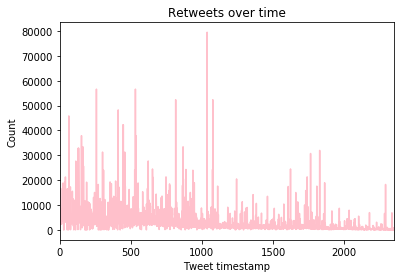

In [51]:
tweet_json_clean['retweet_count'].plot(color = 'pink')
plt.title('Retweets over time')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.show()

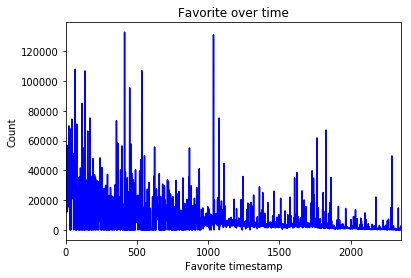

In [52]:
tweet_json_clean['favorite_count'].plot(color = 'blue')
plt.title('Favorite over time')
plt.xlabel('Favorite timestamp')
plt.ylabel('Count')
plt.show()

In [53]:
result = pd.merge(df_clean,tweet_json_clean)
result.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breeds,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,758,1189
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,213,634
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4324,7989
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,317,1175
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,478,1225


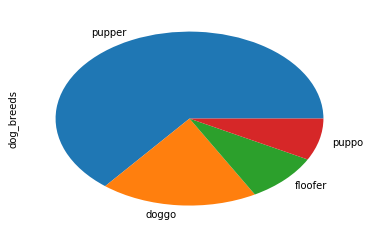

In [54]:
result[result['dog_breeds']!= 'None']['dog_breeds'].value_counts().plot(kind = 'pie')
plt.savefig("image1.png")


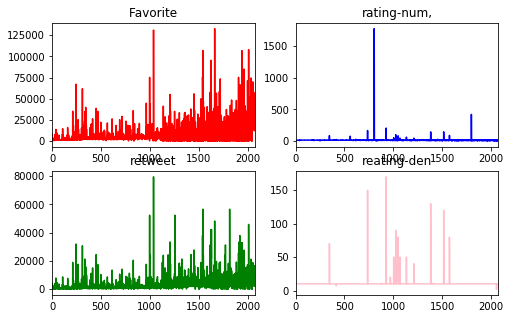

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

result['favorite_count'].plot(ax=axes[0,0],color='r'); axes[0,0].set_title('Favorite')
result['rating_numerator'].plot(ax=axes[0,1],color='b'); axes[0,1].set_title('rating-num,')
result['retweet_count'].plot(ax=axes[1,0],color='g'); axes[1,0].set_title('retweet')
result['rating_denominator'].plot(ax=axes[1,1],color='pink'); axes[1,1].set_title('reating-den')
plt.savefig("image2.png")


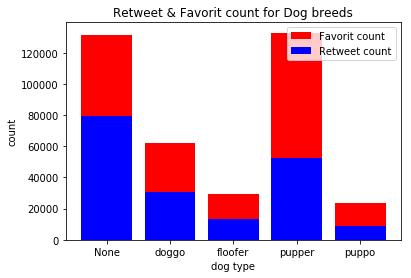

In [56]:
plt.bar(result['dog_breeds'],result['favorite_count'], label="Favorit count", color='r')

plt.bar(result['dog_breeds'],result['retweet_count'], label="Retweet count", color='b')
plt.legend()
plt.xlabel('dog type')
plt.ylabel('count')

plt.title('Retweet & Favorit count for Dog breeds')
plt.show()

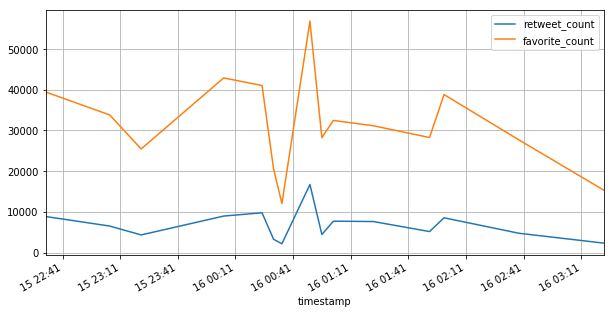

In [57]:
result[-15:].plot(x='timestamp', y=['retweet_count', 'favorite_count'] ,figsize=(10,5), grid=True  )
plt.savefig("image4.png")

